# I)-Setup 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "./bank/"
OBJECTIVE_ID = "Binary_classification_HaiRun"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", OBJECTIVE_ID, fig_id + ".png")
    print(path)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Importing data

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Reading file
data = pd.read_csv('bank/bank.csv', sep=';')

In [4]:
#The full data
data_full = pd.read_csv('bank/bank-full.csv', sep=';')

### bank client data:

1.  age (numeric)
2.  job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3.  marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4.  education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5.  default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6.  housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7.  loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

#### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)

9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)

11. duration: last contact duration, in seconds (numeric). 

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)

We are going to use the full data

# II)- EDA 

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
len(data_full.columns) # the number of attributes + 1(the output target)

17

In [7]:
features = ['age', 	'job' ,	'marital', 	'education', 	'default','balance', 	'housing', 	'loan', 	'contact', 	'day','month','duration', 	'campaign', 	'pdays', 	'previous', 	'poutcome']

In [8]:
data_full[data_full.duplicated(keep='last')] #no duplicated entries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


**Observations:** 

no missing value attributes,

no duplicated entries,

number of attributes = 16 ,

output target= y 

In [9]:
data_full.describe() #concerns only the numerical features

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Observations from numerical features:**

50% of the customers have been contacted twice during this campaign and most were not previously contacted (-1). This means that this data represent fairly new customers to this campaing and who have not been contacted earlier. 50% of the customers are aged 39 years old.



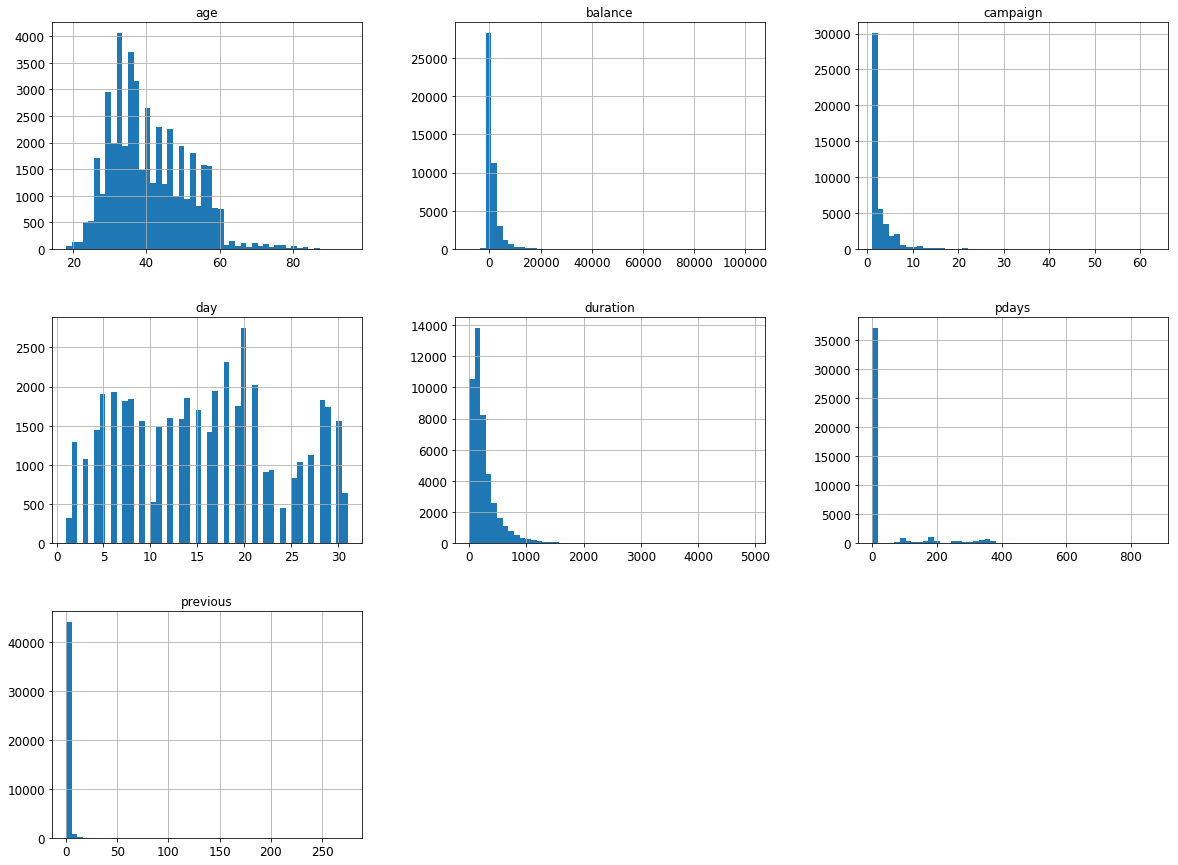

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data_full.hist(bins=50, figsize=(20,15),grid=True)
plt.show()

**Observation:**


1. The features do not have the same scale. 
2. Of course they do not have the same unit as well, some are just numerical and some are expressed in second and USD.
3. These distributions are not Gaussian and some are even skewed. This may make it a bit harder for some Machine Learning algorithms to detectpatterns. We will try transforming these attributes later on to have more bell-shaped distributions.

# II.1) Data Viz 

 1.1) Let' s first take a look at the output target

./bank/images\Binary_classification_HaiRun\output_target_distribution.png
Saving figure output_target_distribution


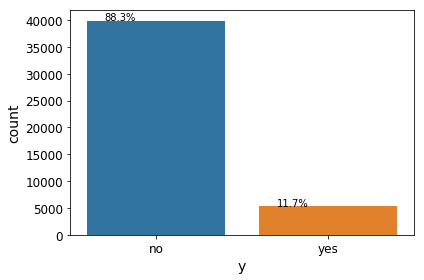

In [11]:
y = data_full['y']
ax = sns.countplot(x = 'y', data=data_full)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(y)), (p.get_x()+0.1, p.get_height()+5))
save_fig('output_target_distribution')
plt.show()

The data is very unbalanced as such we will not use the accuracy indicator for our future models. Instead we will use the ROC curve as it plots the true positive rate (another name for recall) against the false positive rate.

1.2) Let's explore each **categorical feature** and find out the class distribution per feature

In [12]:
%matplotlib inline

def countplot_cat_features_vs_y(cat_features, dataset):
    plt.figure(figsize=(18,8))
    
    features= dataset[cat_features]
    total = len(features)
    ax = sns.countplot(x = features, data=data_full, hue='y')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(y)), (p.get_x()+0.1, p.get_height()+5))
    save_fig('countplot '+ cat_features+' vs y')
    plt.show()

**<ul>
    <li>Job</li>
</ul>**

./bank/images\Binary_classification_HaiRun\countplot job vs y.png
Saving figure countplot job vs y


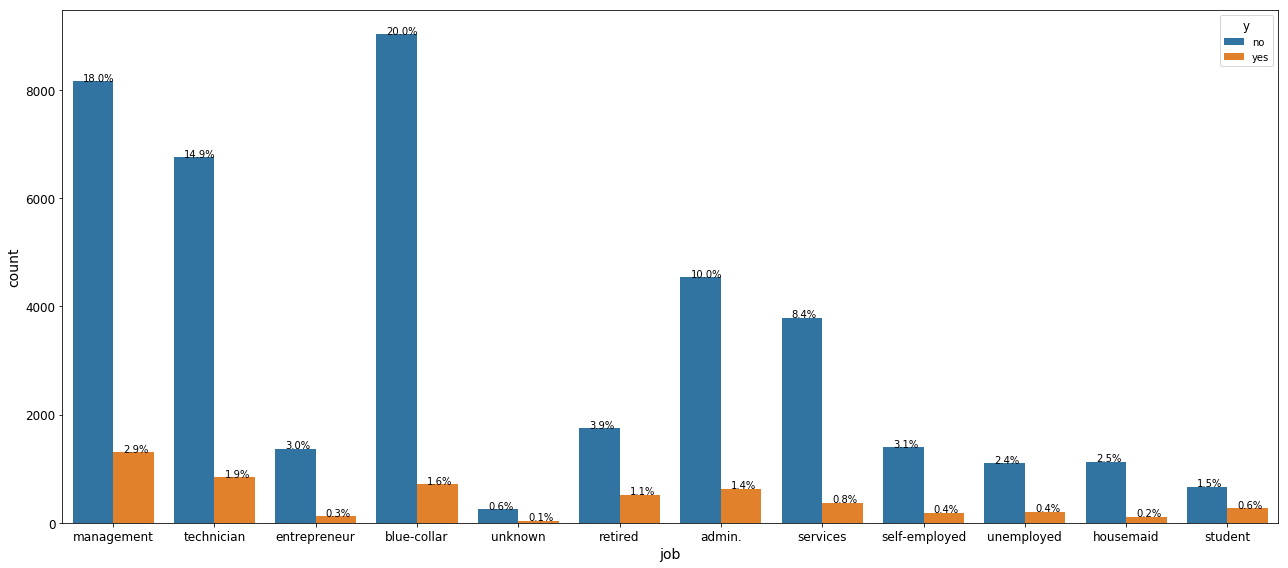

In [13]:
countplot_cat_features_vs_y('job',data_full)

Observation:
People with a job of management have the high rate (29%) of subscribing to a specific product/service after the campagn (bank marketing) whereas the housemaid and unknown ones react the least with 0.2% and 0.1% respectively.


**<ul>
    <li>marital</li>
</ul>**

./bank/images\Binary_classification_HaiRun\countplot marital vs y.png
Saving figure countplot marital vs y


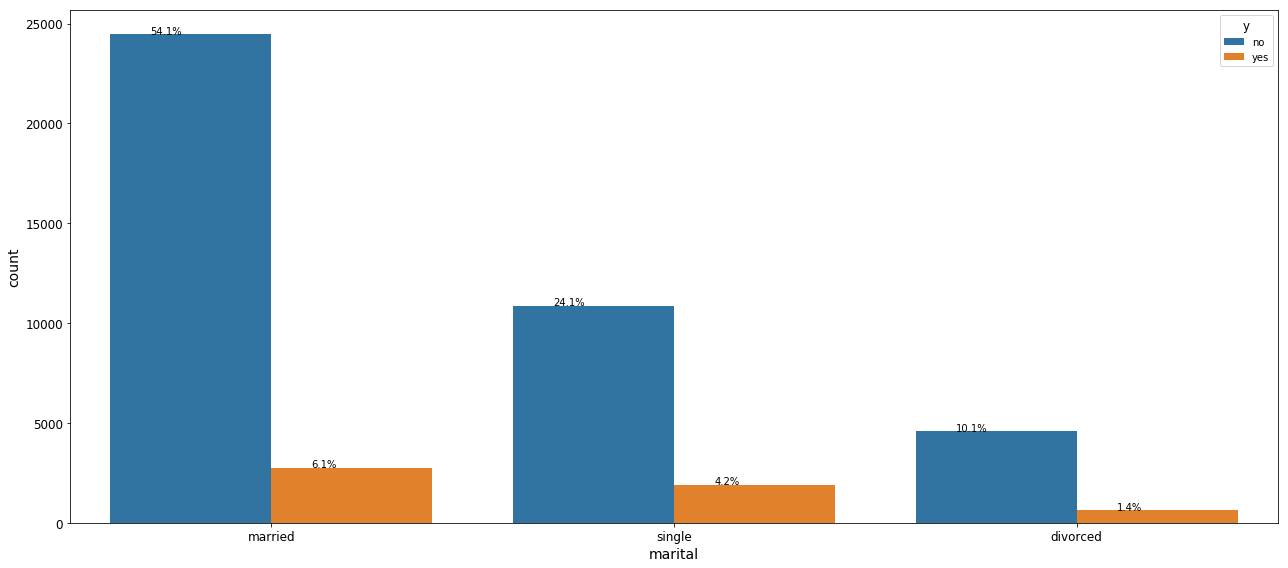

In [14]:
countplot_cat_features_vs_y('marital',data_full)

Married people have good response to the bank marketing with 67% of them responded yes (susbscribed or used the service / product)

**<ul>
    <li>education</li>
</ul>**

./bank/images\Binary_classification_HaiRun\countplot education vs y.png
Saving figure countplot education vs y


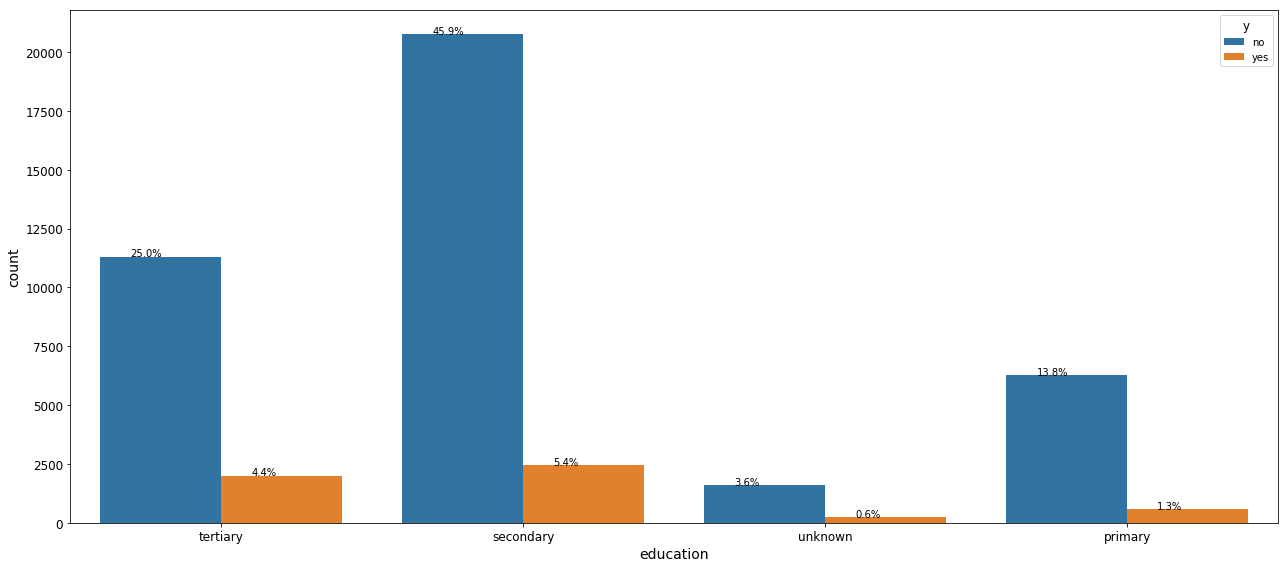

In [15]:
countplot_cat_features_vs_y('education',data_full)

**<ul>
    <li>default</li>
</ul>**

./bank/images\Binary_classification_HaiRun\countplot default vs y.png
Saving figure countplot default vs y


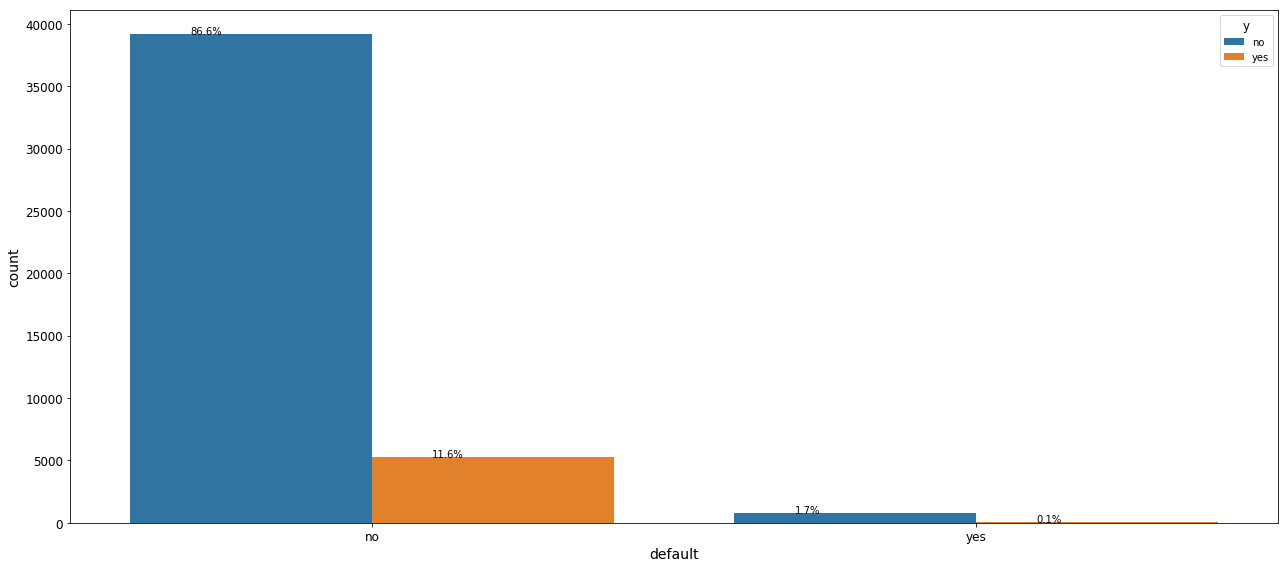

In [16]:
countplot_cat_features_vs_y('default',data_full)

Only people with no credit in default have high rate of positive response to the campaign

**<ul>
    <li>housing</li>
</ul>**

./bank/images\Binary_classification_HaiRun\countplot housing vs y.png
Saving figure countplot housing vs y


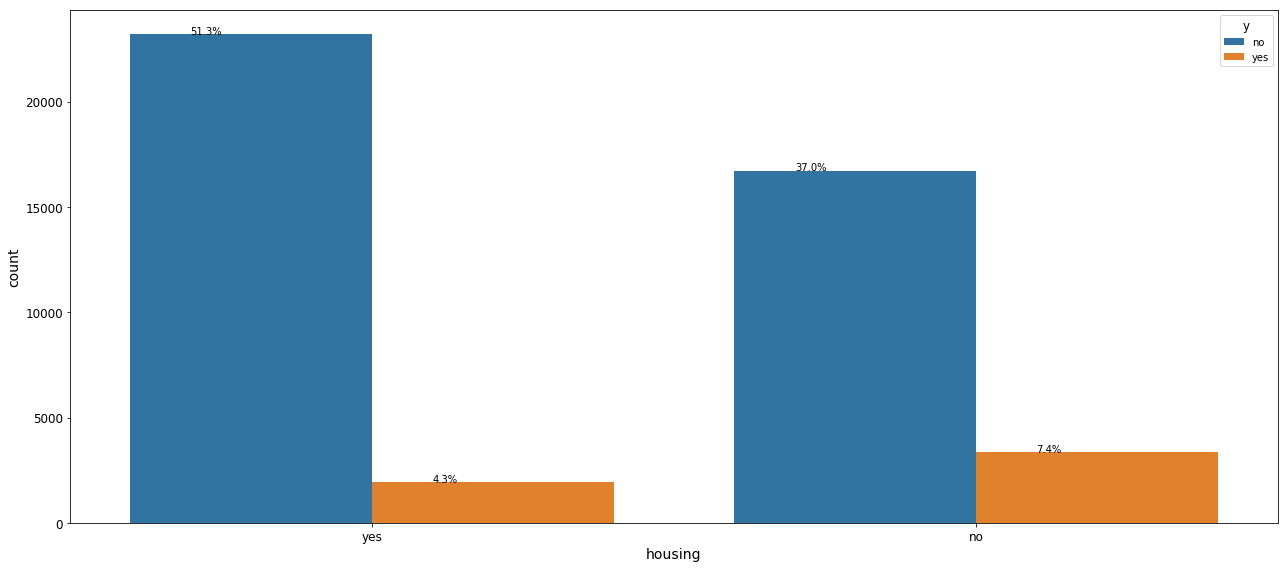

In [17]:
countplot_cat_features_vs_y('housing',data_full)

<ul>
    <li>loan</li>
</ul>

./bank/images\Binary_classification_HaiRun\countplot loan vs y.png
Saving figure countplot loan vs y


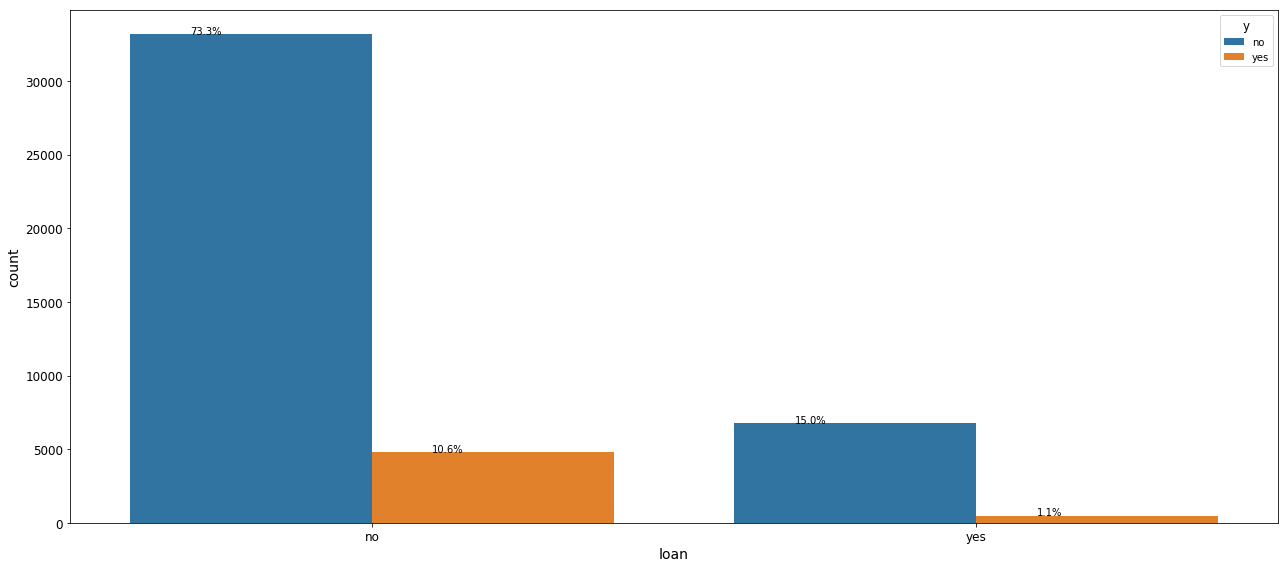

In [18]:
countplot_cat_features_vs_y('loan',data_full)

The same goes for people with no housing loan or personal loans

<ul>
    <li>contact</li>
</ul>

./bank/images\Binary_classification_HaiRun\countplot contact vs y.png
Saving figure countplot contact vs y


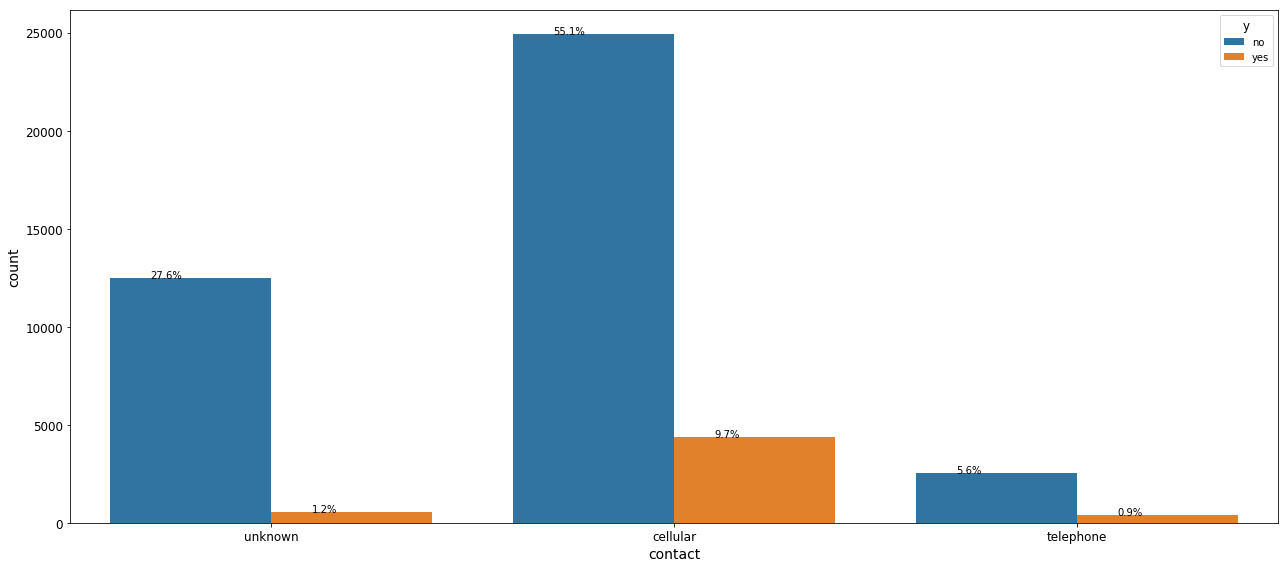

In [19]:
countplot_cat_features_vs_y('contact',data_full)

It looks like people with cellular phones responded the most, probably due to the fact of being more accessible with a cellular phone

<ul>
    <li>month</li>
</ul>

./bank/images\Binary_classification_HaiRun\countplot month vs y.png
Saving figure countplot month vs y


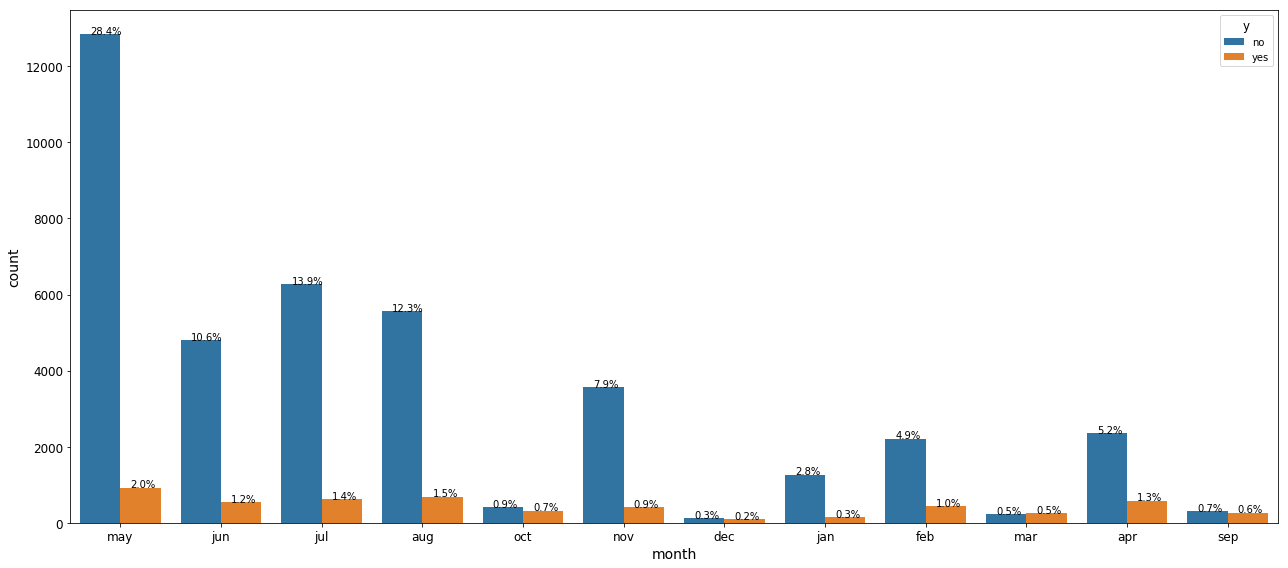

In [20]:
countplot_cat_features_vs_y('month',data_full)

People called in may seem to have better response to the campaign. However, not very well in terms of the ratio as people in May who did not react to the campaign represent already 28.4 of the data. On the other hand, with the other months such as March, September , October and December present pretty evenly distributed reaction to the campaign.

We cannot really assume that this feature is very usefull in terms of information. In fact, we don't know what happend during these specific months as the trend we observe won't allow us to conclude anything, it may be purely random not because of an underlying seasonality or whatsoever. So we can discard this feature

<ul>
    <li>poutcome</li>
</ul>

./bank/images\Binary_classification_HaiRun\countplot poutcome vs y.png
Saving figure countplot poutcome vs y


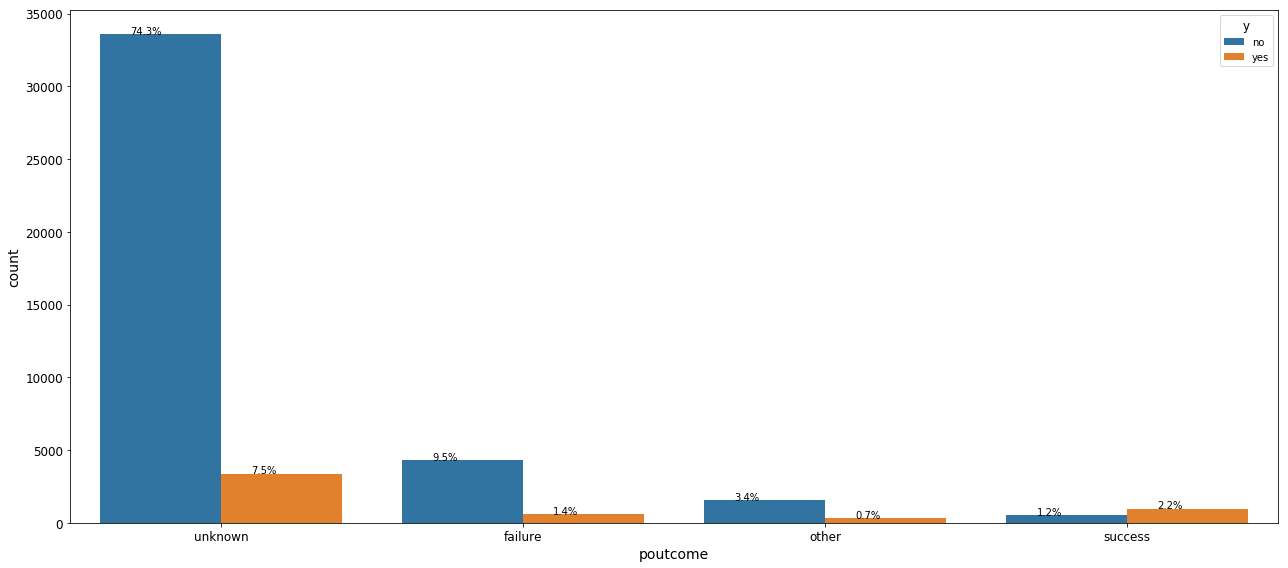

In [21]:
countplot_cat_features_vs_y('poutcome',data_full)

Here we have people who had positive outcome from the previous campaign responded well to the current campaign. The majority of them did subscribed to the product/service targeted by the current marketting (2.2% vs 1.2% of the data).

We can make an assumption that this feature may be important in the prediction of the target variable, especially people in the category success of poutcome.


So, overall features represent unbalanced value for the target label **except for the previous outcome feature (poutcome) especially in its category success. Thus it will be considered for further analysis**

1.3) Let's explore each **numerical feature** and find out their distribution

In [22]:
%matplotlib inline

def boxplot_num_features_vs_y(cat_features, dataset):
    plt.figure(figsize=(18,8))
    
    features= dataset[cat_features]
    total = len(features)
    ax = sns.boxplot( data=data_full, x='y', y = features)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(y)), (p.get_x()+0.1, p.get_height()+5))
    
    
    save_fig('countplot '+ cat_features+' vs y')
    plt.show()

**age:** 

./bank/images\Binary_classification_HaiRun\countplot age vs y.png
Saving figure countplot age vs y


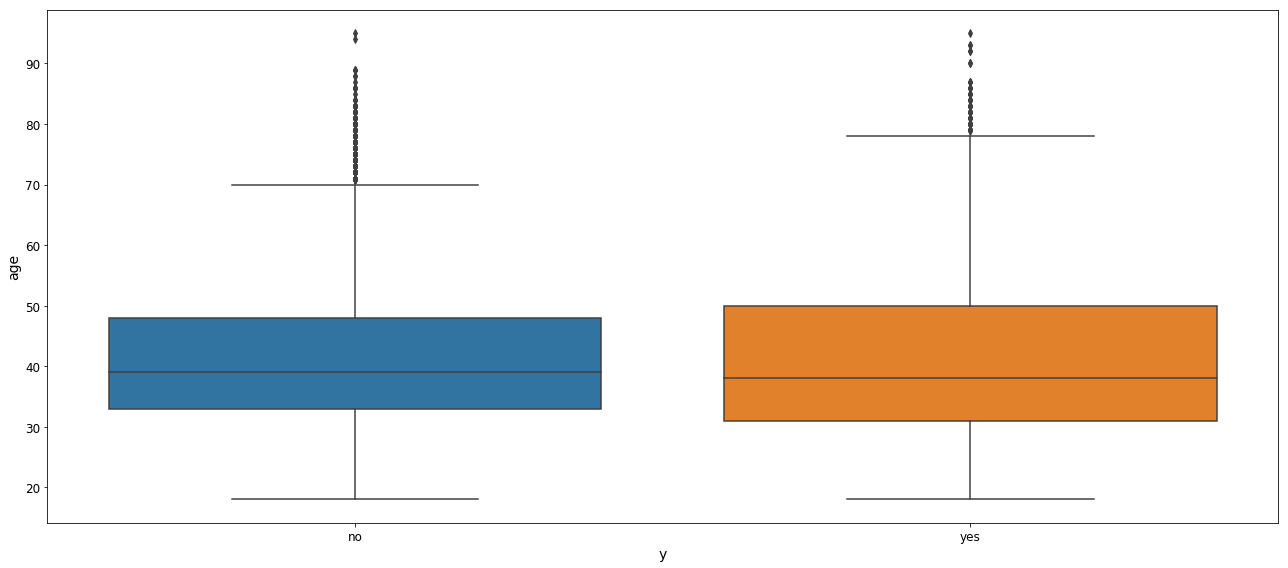

In [23]:
boxplot_num_features_vs_y('age',data_full)

We see that both customers who subscribed or didnt subscribed has a median age around 40 years old.
Besides, their distributions do overlap which means this is not a good indicators for customers subscription or not

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

./bank/images\Binary_classification_HaiRun\distribution_age.png
Saving figure distribution_age


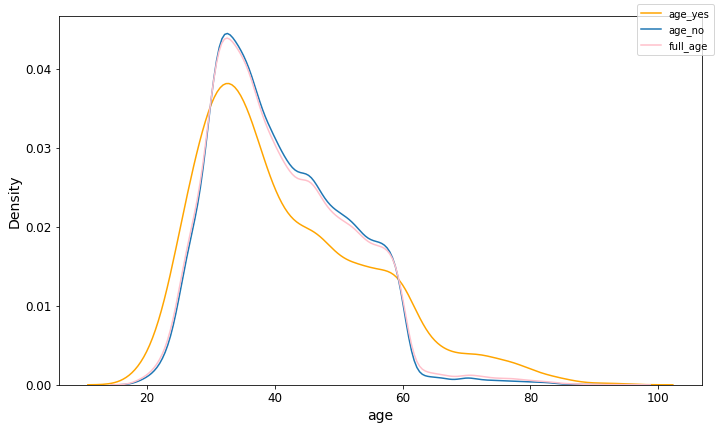

In [24]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data_full[data_full['y']=='yes']['age'],color='orange', hist=False)
sns.distplot(data_full[data_full['y']=='no']['age'], hist=False)
sns.distplot(data_full['age'],color='pink', hist=False)
fig.legend(labels=['age_yes','age_no','full_age'])
plt.show
save_fig('distribution_age')

**balance:**

./bank/images\Binary_classification_HaiRun\countplot balance vs y.png
Saving figure countplot balance vs y


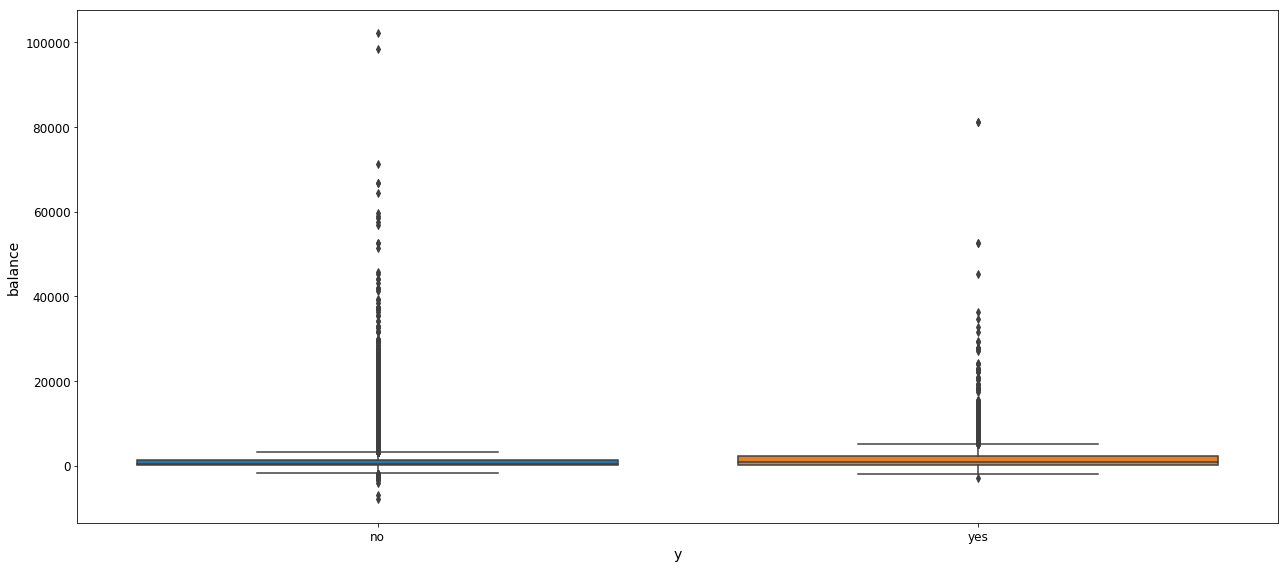

In [25]:
boxplot_num_features_vs_y('balance',data_full)

**campaign:**

./bank/images\Binary_classification_HaiRun\countplot campaign vs y.png
Saving figure countplot campaign vs y


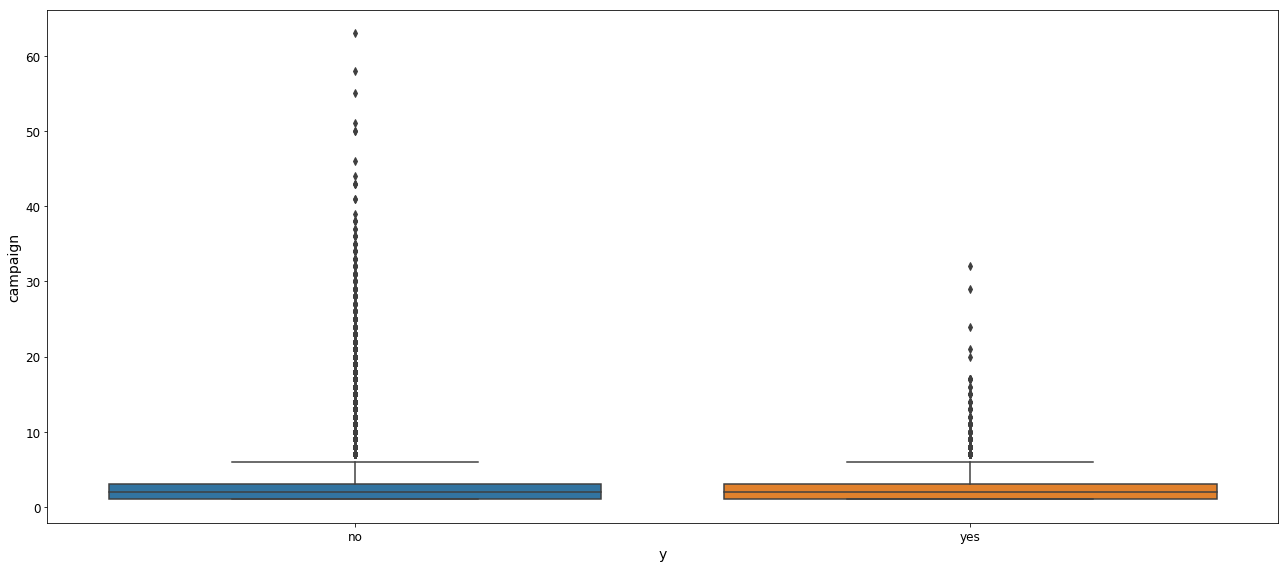

In [26]:
boxplot_num_features_vs_y('campaign', data_full)

**pdays: **

./bank/images\Binary_classification_HaiRun\countplot pdays vs y.png
Saving figure countplot pdays vs y


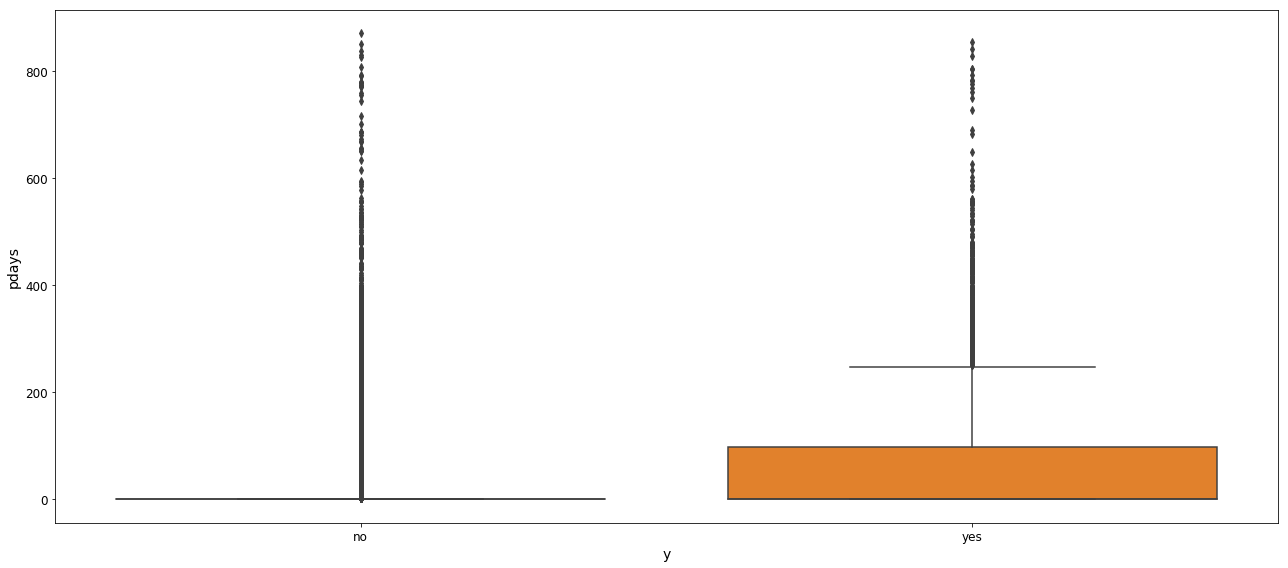

In [27]:
boxplot_num_features_vs_y('pdays', data_full)

./bank/images\Binary_classification_HaiRun\countplot previous vs y.png
Saving figure countplot previous vs y


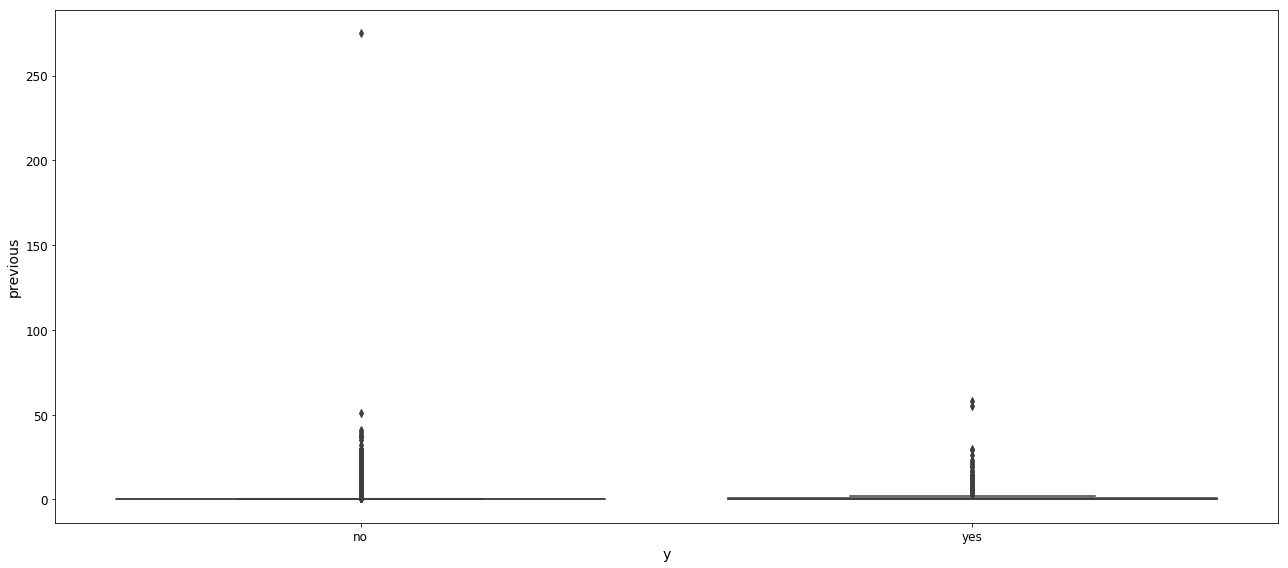

In [28]:
boxplot_num_features_vs_y('previous', data_full)

./bank/images\Binary_classification_HaiRun\countplot balance vs y.png
Saving figure countplot balance vs y


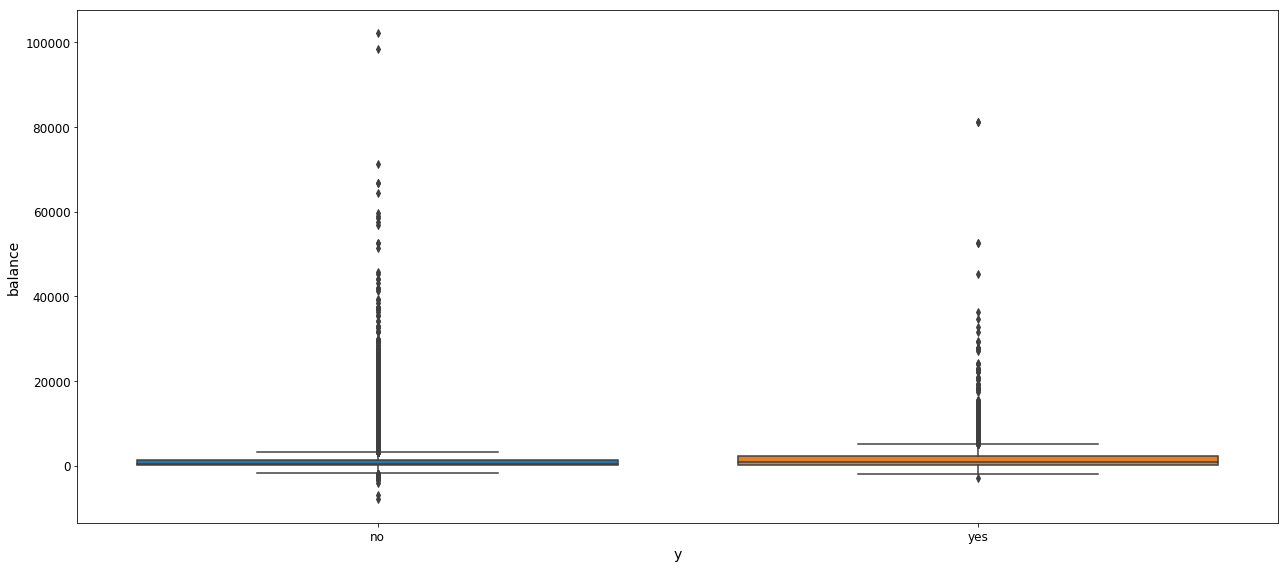

In [29]:
boxplot_num_features_vs_y('balance',data_full)

**duration:** The last contact duration (in seconds)

In [30]:
data.duration.describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

There are customers with whom the bank responsible spent about 50 min in the last contact while the median is around 3 min only

./bank/images\Binary_classification_HaiRun\countplot duration vs y.png
Saving figure countplot duration vs y


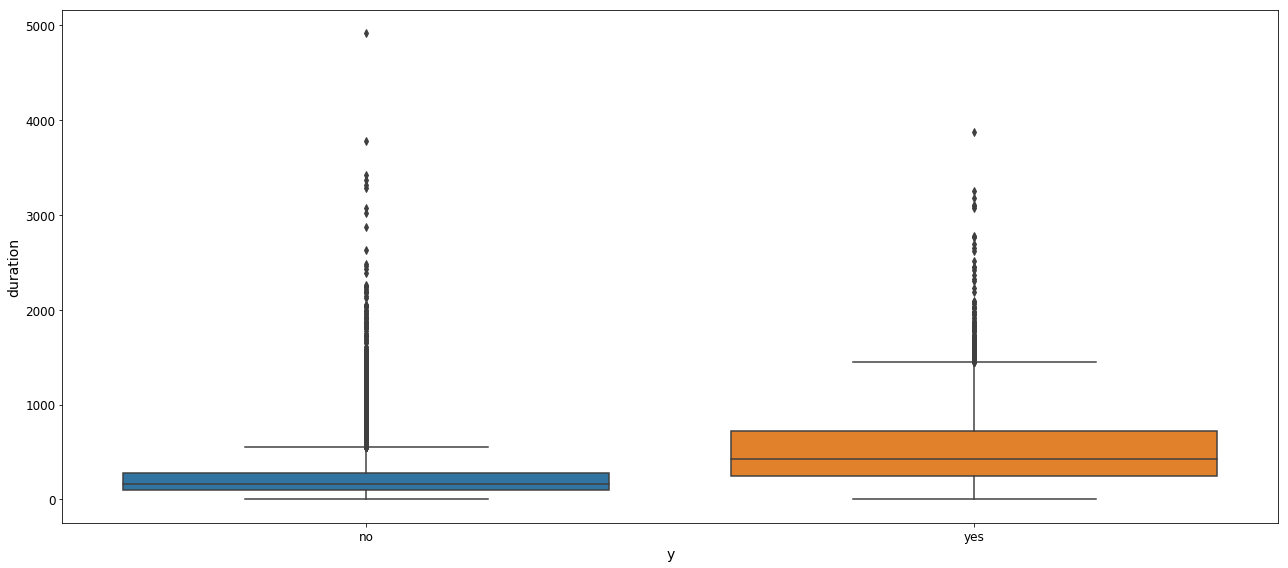

In [31]:
boxplot_num_features_vs_y('duration',data_full)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

./bank/images\Binary_classification_HaiRun\distribution of the duration feature.png
Saving figure distribution of the duration feature


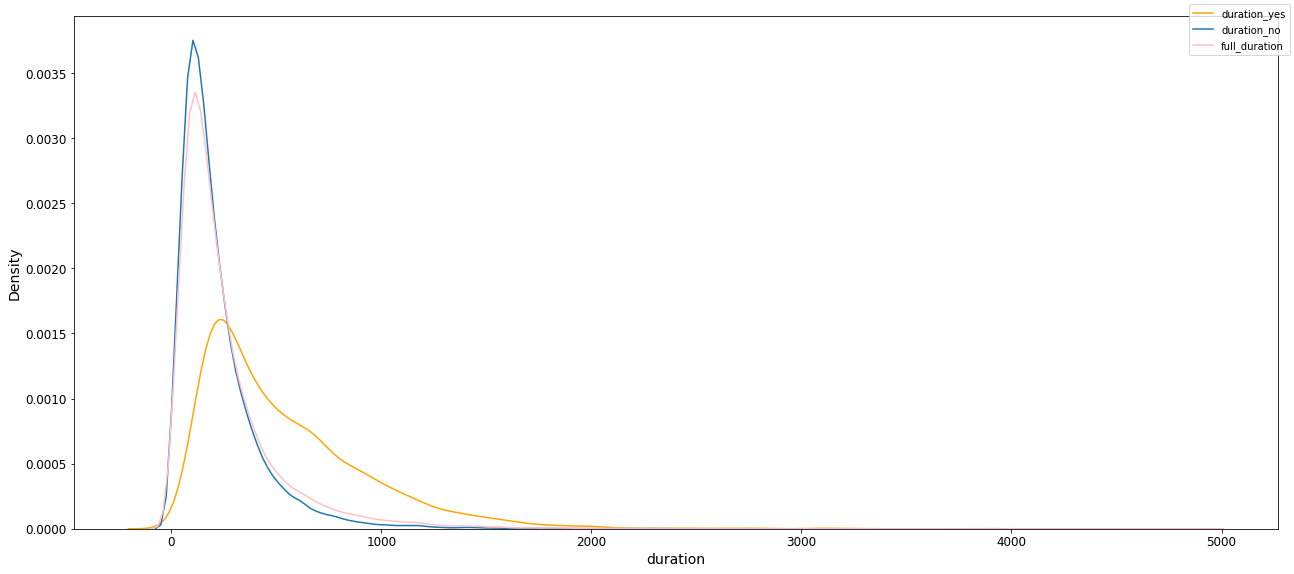

In [32]:
fig = plt.figure(figsize=(18,8))
sns.distplot(data_full[data_full['y']=='yes']['duration'],color='orange', hist=False)
sns.distplot(data_full[data_full['y']=='no']['duration'], hist=False)
sns.distplot(data_full['duration'],color='pink', hist=False)
fig.legend(labels=['duration_yes','duration_no','full_duration'])
save_fig('distribution of the duration feature')

Each class distribution doesn't seem to overlap and the medians are clearly separated. **Therefore we can assume this feature highly impacts the prediction of the output label.**

In fact, this attribute **highly affects the output target** (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be discarded in order to have a realistic predictive model.

## II.2 ) Correlation

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


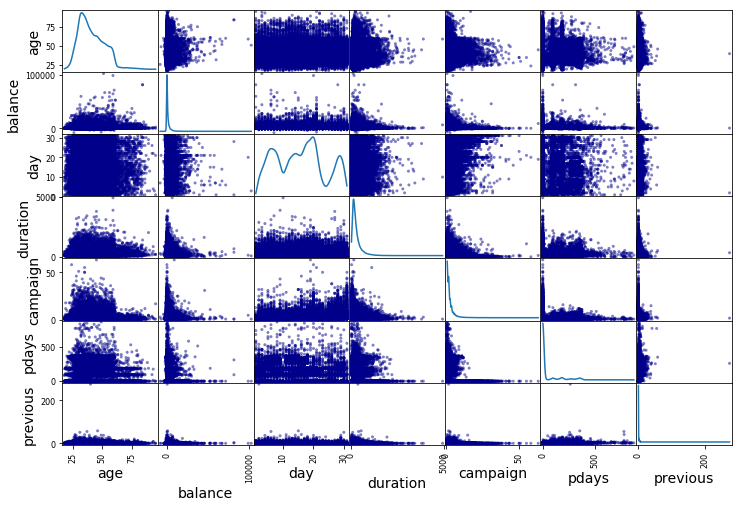

In [33]:
from pandas import scatter_matrix
scatter_matrix(data_full, figsize=(12,8),diagonal='kde', c='darkblue')
plt.show()


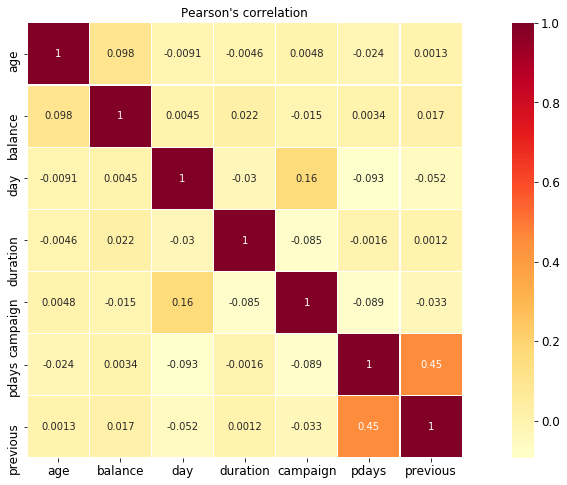

./bank/images\Binary_classification_HaiRun\correlation.png
Saving figure correlation


<Figure size 432x288 with 0 Axes>

In [34]:
%matplotlib inline
corr = data_full.corr()
matrix = np.triu(data_full.corr())
f, ax = plt.subplots(figsize=(18,8))


#sns.heatmap(corr, cmap="YlOrRd", square=True, ax=ax, annot=True, mask=matrix , linewidth=0.1)
sns.heatmap(corr, cmap="YlOrRd", square=True, ax=ax, annot=True,  linewidth=0.1)

plt.title("Pearson's correlation")
plt.show()
save_fig('correlation')

No features are correlated, only pdays and previous days seem to have higher correlation.

## II.3) Creating a test set

In [35]:
Xdata = data_full.iloc[:,:-1] 
ydata = data_full['y']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size = 0.2)

In [37]:
y_train.replace({"no":0, 'yes':1},inplace=True)
y_test.replace({"no":0, 'yes':1},inplace=True)

## II.4) Prepare Data For Machine Learning Algorithms

#### II.4.1) Data Preprocessing

In [38]:
data_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

We're gonna need to distinguish the categorical and numerical features.

In [39]:
cat_features = Xdata.dtypes ==  'object'
num_features = Xdata.dtypes != 'object'

cat_features_cols = list(Xdata.columns[cat_features])
num_features_cols = list(Xdata.columns[num_features])

X_train_num = X_train[num_features_cols]
X_train_cat = X_train[cat_features_cols]

X_test_num = X_test[num_features_cols]
X_test_cat = X_test[cat_features_cols] 

##### II.4.1.a)Handling Text and Categorical Attributes

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    
    # Encoding training dataset  
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)
    
    return X_train, X_test

In [41]:
X_train_cat_tr ,X_test_cat_tr = OneHotEncoder(cat_features_cols, X_train, X_test)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [42]:
X_train_cat_tr = X_train_cat_tr.drop(columns=cat_features_cols)
X_test_cat_tr = X_test_cat_tr.drop(columns=cat_features_cols)


##### II.4.1.b)Feature Scaling

Most Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales. This is the case for the Bank Marketing data.

We are going to use the Standardization methode with the 'StandarScaler' class.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

X_train_num_tr = num_pipeline.fit_transform(X_train_num)
X_test_num_tr = num_pipeline.fit_transform(X_test_num)

In [44]:
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=num_features_cols, index=X_train_cat_tr.index)
X_test_num_tr = pd.DataFrame(X_test_num_tr, columns=num_features_cols, index=X_test_cat_tr.index)

In [45]:
def combining_processed_features(X_train_cat_tr, X_train_num_tr, X_test_cat_tr, X_test_num_tr):
    return pd.concat([X_train_num_tr,X_train_cat_tr.drop(columns=num_features_cols)], axis=1), pd.concat([X_test_num_tr,X_test_cat_tr.drop(columns=num_features_cols)], axis=1)

X_train, X_test  = combining_processed_features(X_train_cat_tr, X_train_num_tr, X_test_cat_tr, X_test_num_tr)

# III) Mathematical modelling

This problem is call a binary classification.

A binary classification problem sees us observing $(X_1, Y_1),\cdot \cdot \cdot ,(X_n,Y_n) $ that are $n$ independent random copies of $(X,Y) \in \chi \times \{0,1\}$. Denote by $P_{X,Y}$ the joint distribution of $(X,Y)$. 
The so-called $feature ~X$ lives in some abstract space $\chi$(e.g: $\R^d$ and  $Y \in \{0,1\}$ is called $label$. 

The goal of binary classification is to build a rule to predict $Y~ given~X$ using only the data at hand. 
such a rule is a function $h: \chi \to \{0,1\}$ called a $classifier$. 
    Some classifiers are better than others and we will favore ones that have low $classification~ error$ $R(h) = \P(h(X) \neq Y)$.
    
    


The performance metric used for this case study is AUC ROC score also known as AUROC (Area Under the Receiver Operating Characteristics).

The reason we are choosing AUC over accuracy is because,
as we saw in Exploratory data analysis, the dataset we are working with is an imbalanced dataset with the class “no” being the majority class. If we use accuracy as our metric, any random model can give us a very good accuracy. But at the end, it will be a random model. AUC gets over this problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.

# IV) Modelling

## IV.1) Keep the duration feature
### 1. Logistic Regression
Before we discard the 'duration' feature, let's have a glance at a simple logistic regression model.

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict #used to get all the prediction for each instance



E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# get the scores of all instances in the training set using the cross_val_predict()

y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="decision_function")

Here we want to make cross check every model on the training set first and then when we are happy with its performance within the training set, then we finally use the test set.
In order to plot the ROC curve and the score, we need a set of prediction which is why we used the cross_val_predict() class by mentioning a specific method, the decision_function and predict_proba for the case of KNN and RandomForest classifiers.


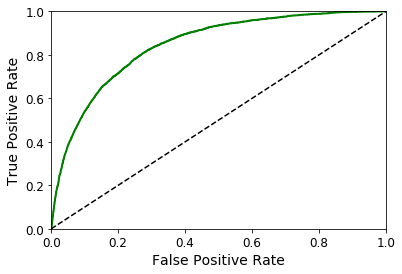

In [48]:
#Plotting the ROC curve for the logit Regression
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'g',linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
print("The AUC score with duration is ",roc_auc_score(y_train, y_scores))

The AUC score with duration is  0.8435456850253997


## IV.2)  Discard the 'duration' feature
Let's also try few models for the sake of comparison.

In [50]:
X_train_dropped = X_train.drop(columns='duration')
X_test_dropped = X_test.drop(columns='duration')

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# get the scores of all instances in the training set using the cross_val_predict()

y_scores_dropped = cross_val_predict(log_reg, X_train_dropped, y_train, cv=3, method="decision_function")

logReg_dropped_fpr, logReg_dropped_tpr, logReg_dropped_thresholds = roc_curve(y_train, y_scores_dropped)

print("The AUC score without duration is ",roc_auc_score(y_train, y_scores_dropped))

The AUC score without duration is  0.6593190964969391


We can see that the model's performance has dropped drastically. We will continue our study to from here to find more realistic models. For now, for the sake of exploring we are not going to consider the hyperparameters of each model as we let their values to default ones. Therefore the ROC AUC score we will obtain will not represent the optimal score for most of the algorithm tested below. It's only after then that we are fine tuning these parameters and see their performance when we use the test set.

Let's plot them together

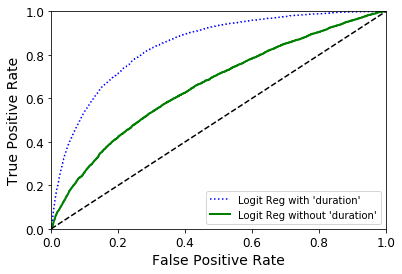

In [51]:
plt.plot(fpr, tpr, "b:", label="Logit Reg with 'duration'")
plot_roc_curve(logReg_dropped_fpr, logReg_dropped_tpr, "Logit Reg without 'duration'")
plt.legend(loc="lower right")
plt.show()

### 2. Stochastic Gradient Descent Classifier  

In [52]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_dropped, y_train)

y_scores_sgd_clf = cross_val_predict(sgd_clf, X_train_dropped, y_train, cv=3,method='decision_function')
fpr_sgd , tpr_sgd , threshold_sgd = roc_curve(y_train, y_scores_sgd_clf)

print("The SGDClassifier AUC score ",roc_auc_score(y_train, y_scores_sgd_clf))

The SGDClassifier AUC score  0.5609339456371601


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

### 3. Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10,random_state=42 )
forest_clf.fit(X_train_dropped, y_train)

y_probas_forest = cross_val_predict(forest_clf, X_train_dropped, y_train, cv=3,method='predict_proba')
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest , tpr_forest , threshold_forest = roc_curve(y_train, y_probas_forest[:,1]) #or y_scores_forest

print("The RandomForest AUC score ",roc_auc_score(y_train, y_probas_forest[:,1]))

The RandomForest AUC score  0.6582632889069567


### 4. KNN classifier

In [54]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_dropped, y_train)


y_train_knn_pred = cross_val_predict(knn_clf, X_train_dropped, y_train, cv=3, n_jobs=-1,method='predict_proba')
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train,y_train_knn_pred[:,1])


print("The KNN AUC score ",roc_auc_score(y_train, y_train_knn_pred[:,1]))

E:\Anaconda\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


The KNN AUC score  0.6213203578032824


### Plotting altogether

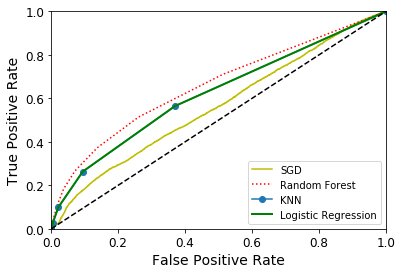

The SGDClassifier AUC score  0.5609339456371601
The RandomForest AUC score  0.6582632889069567
The Logistic Regression AUC score  0.6593190964969391
The KNN AUC score  0.6213203578032824


In [55]:
plt.plot(fpr_sgd, tpr_sgd, 'y', label="SGD")
plt.plot(fpr_forest, tpr_forest, 'r:', label='Random Forest')
plt.plot(fpr_knn, tpr_knn, 'o-',label="KNN")
plot_roc_curve(fpr_knn, tpr_knn, "Logistic Regression")
plt.legend(loc="lower right")
plt.show()

print("The SGDClassifier AUC score ",roc_auc_score(y_train, y_scores_sgd_clf))
print("The RandomForest AUC score ",roc_auc_score(y_train, y_scores_forest))
print("The Logistic Regression AUC score ",roc_auc_score(y_train, y_scores_dropped))
print("The KNN AUC score ",roc_auc_score(y_train, y_train_knn_pred[:,1]))

## IV.2) Hyperparameter tuning with GridSearchCV

Now that we have our base models, we will try to find their optimal hyperparameters so that hopefully we find a better score for each model. One approach to do that is the GridSearch Cross Validation.

### 1. Grid Search Logistic Regression


In [68]:
grid_cv_output ={"Model":[],'Score':[]}
grid_cv_best_params =[]

from sklearn.model_selection import GridSearchCV

def gridcv_for_each_model(model_name,grid_params, X_train, y_train, column_grid_output):
    from sklearn.model_selection import GridSearchCV

    #model_to_run = list(model_name.keys())
    model = model_name#['LogisticRegression']
    print('===================')
    print('model=', model)

    model_grid_search = GridSearchCV(model, grid_params, cv=5, scoring = 'accuracy', error_score = 0)
    model_grid_result = model_grid_search.fit(X_train_dropped, y_train)
    #print(dir(model_grid_result))
    


    print("Best %s:  %f \n \n using %s" % (model, model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    print('Column=' ,column_grid_output)
    grid_cv_output['Model'].append(column_grid_output)
    grid_cv_output['Score'].append(model_grid_result.best_score_)
    grid_cv_best_params.append(model_grid_result.best_params_)
    #grid_cv_output['Test AUC'].append(roc_auc_score(y_test, y_predict))
    
    
        
model_name = [
    LogisticRegression(),
    SGDClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
    ]
param_grid = [
    [{'penalty':['l2'],'C':[100, 10, 1.0, 0.1, 0.01],'class_weight':['balanced']}],
    [{'penalty':['l2'],'alpha':[100, 10, 1.0, 0.1, 0.01],'class_weight':['balanced']}],
    [
{'n_estimators': [3,10,30], 'max_features': [2, 4, 6, 8]}, 
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ],
    [{
    'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5], 
    'metric':['euclidean', 'manhattan', 'minkowski']
              }]

]

column_grid_output = ['LogisticRegression','SGDClassifier','RandomForestClassifier','KNeighborsClassifier']

for i,j in zip(range(len(model_name)),range(len(param_grid))):
    gridcv_for_each_model(model_name[i],param_grid[j],X_train_dropped,y_train, column_grid_output[i])

model= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):  0.666722 
 
 using {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.666667 (0.008544) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.666667 (0.008544) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.666722 (0.008646) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.666390 (0.008819) with: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.664648 (0.008905) with: {'C': 0.01, 'class_weight': 

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

Best SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False):  0.782294 
 
 using {'alpha': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.730342 (0.307157) with: {'alpha': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.730314 (0.307143) with: {'alpha': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.696196 (0.281783) with: {'alpha': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.782294 (0.001504) with: {'alpha': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.741318 (0.003853) with: {'alpha': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Column= SGDClassifier
model= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_le

In [92]:
copy_grid_cv_output = grid_cv_output


In [96]:
grid_cv_output={'Model': ['LogisticRegression',
  'SGDClassifier',
  'RandomForestClassifier',
  'KNeighborsClassifier'],
 'Score': [0.6667219641672196,
  0.7822937403229374,
  0.8831287325812873,
  0.8812762663127627],}

In [97]:
#use the best_parameters to define the best model
def using_the_best_model(model_name,grid_cv_best_params, X_train_dropped, y_train, X_test_dropped, copy_grid_cv_output):
    #model = model_name
    #print(type(model))
    best_model= model_name
    final_model = best_model.fit(X_train_dropped, y_train)
    predict_y_train = final_model.predict(X_train_dropped)
    #copy_grid_cv_output['Train AUC'].append(roc_auc_score(y_train, predict_y_train))
    #prediction:
    predict_y_test = final_model.predict(X_test_dropped)
    #copy_grid_cv_output['Test AUC'].append(roc_auc_score(y_test, predict_y_test))



In [98]:
grid_cv_best_params=[{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'},
 {'alpha': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'},
                     {'max_features': 8, 'n_estimators': 30},
                     {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
                     
    ]

In [99]:
grid_cv_best_params[2]

{'max_features': 8, 'n_estimators': 30}

In [100]:
grid_cv_best_params=[{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'},
 {'alpha': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'},
                     {'max_features': 8, 'n_estimators': 30},
                     {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
                     
    ]
        
best_model_name = [
        LogisticRegression(**grid_cv_best_params[0]),
        SGDClassifier(**grid_cv_best_params[1]),
        RandomForestClassifier(**grid_cv_best_params[2]),
        KNeighborsClassifier(**grid_cv_best_params[3])
]


for i,j in zip(range(len(best_model_name)),range(len(grid_cv_best_params))):
    using_the_best_model(best_model_name[i],grid_cv_best_params[j],X_train_dropped,y_train,X_test_dropped, copy_grid_cv_output)

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [74]:
copy_grid_cv_output

{'Model': ['LogisticRegression',
  'SGDClassifier',
  'RandomForestClassifier',
  'KNeighborsClassifier'],
 'Score': [0.6667219641672196,
  0.7822937403229374,
  0.8831287325812873,
  0.8812762663127627],
 'Train AUC': [0.6261863082394867, 0.5918394045871077],
 'Test AUC': [0.6265907198461161, 0.5757063001289128]}

# V) Final Result

The best model we have is SGD Classifier with a score of 0.883792 using the best hyperparameters of {'alpha': 10, 'class_weight': 'balanced', 'penalty': 'l2'} in the training test.

It is followed by the RandomForest Classifier with a score of 0.883322 using {'max_features': 4, 'n_estimators': 30} hyperparameters in the training test. 

Then, the last one which is better than the Logistic Regression is the KNeighbors Classifier. Its best score 0.881276 is reached with the following hyperparameters values: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'} in the training test.

In [101]:
pd.DataFrame(grid_cv_output)

,Model,Score
0,LogisticRegression,0.666722
1,SGDClassifier,0.782294
2,RandomForestClassifier,0.883129
3,KNeighborsClassifier,0.881276


We see that the Random Forest performs better. If we were to choose this model, one might consider to show its feature importance. 